
# Polygon Selector Demo


Shows how one can select indices of a polygon interactively.




In [1]:
%matplotlib notebook

In [2]:
import numpy as np

from matplotlib.widgets import PolygonSelector
from matplotlib.path import Path


class SelectFromCollection(object):
    """Select indices from a matplotlib collection using `PolygonSelector`.

    Selected indices are saved in the `ind` attribute. This tool fades out the
    points that are not part of the selection (i.e., reduces their alpha
    values). If your collection has alpha < 1, this tool will permanently
    alter the alpha values.

    Note that this tool selects collection objects based on their *origins*
    (i.e., `offsets`).

    Parameters
    ----------
    ax : :class:`~matplotlib.axes.Axes`
        Axes to interact with.

    collection : :class:`matplotlib.collections.Collection` subclass
        Collection you want to select from.

    alpha_other : 0 <= float <= 1
        To highlight a selection, this tool sets all selected points to an
        alpha value of 1 and non-selected points to `alpha_other`.
    """

    def __init__(self, ax, collection, alpha_other=0.3):
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.alpha_other = alpha_other

        self.xys = collection.get_offsets()
        self.Npts = len(self.xys)

        # Ensure that we have separate colors for each object
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, (self.Npts, 1))

        self.poly = PolygonSelector(ax, self.onselect)
        self.ind = []

    def onselect(self, verts):
        path = Path(verts)
        self.ind = np.nonzero(path.contains_points(self.xys))[0]
        self.fc[:, -1] = self.alpha_other
        self.fc[self.ind, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()

    def disconnect(self):
        self.poly.disconnect_events()
        self.fc[:, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()


# if __name__ == '__main__':
#     import matplotlib.pyplot as plt

#     fig, ax = plt.subplots()
#     grid_size = 5
#     grid_x = np.tile(np.arange(grid_size), grid_size)
#     grid_y = np.repeat(np.arange(grid_size), grid_size)
#     pts = ax.scatter(grid_x, grid_y)

#     selector = SelectFromCollection(ax, pts)

#     print("Select points in the figure by enclosing them within a polygon.")
#     print("Press the 'esc' key to start a new polygon.")
#     print("Try holding the 'shift' key to move all of the vertices.")
#     print("Try holding the 'ctrl' key to move a single vertex.")

#     plt.show()

#     selector.disconnect()

#     # After figure is closed print the coordinates of the selected points
#     print('\nSelected points:')
#     print(selector.xys[selector.ind])

<IPython.core.display.Javascript object>


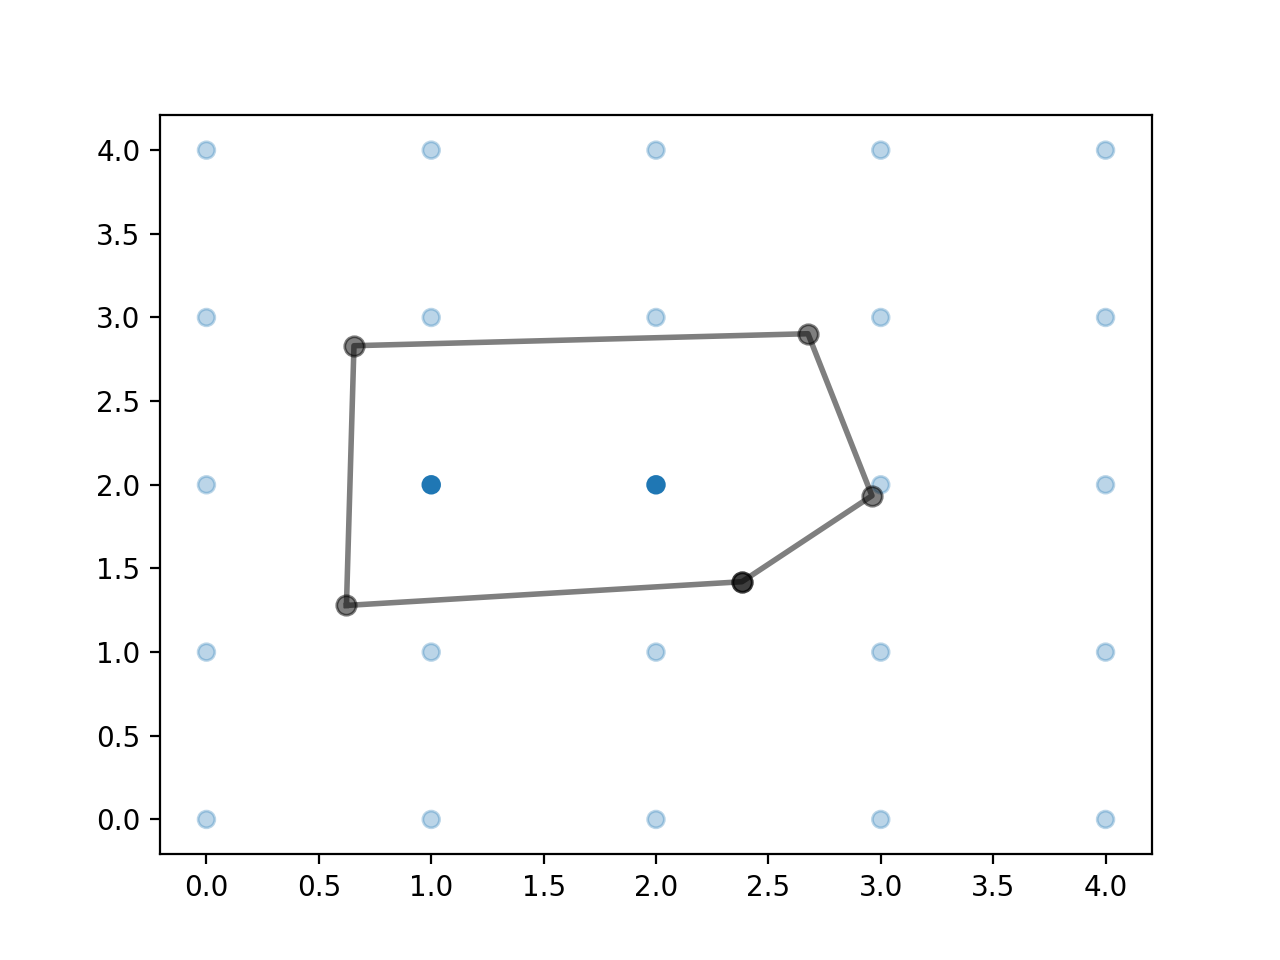

Select points in the figure by enclosing them within a polygon.
Press the 'esc' key to start a new polygon.
Try holding the 'shift' key to move all of the vertices.
Try holding the 'ctrl' key to move a single vertex.


In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
grid_size = 5
grid_x = np.tile(np.arange(grid_size), grid_size)
grid_y = np.repeat(np.arange(grid_size), grid_size)
pts = ax.scatter(grid_x, grid_y)

selector = SelectFromCollection(ax, pts)

print("Select points in the figure by enclosing them within a polygon.")
print("Press the 'esc' key to start a new polygon.")
print("Try holding the 'shift' key to move all of the vertices.")
print("Try holding the 'ctrl' key to move a single vertex.")

plt.show()

# selector.disconnect()

# # After figure is closed print the coordinates of the selected points
# print('\nSelected points:')
# print(selector.xys[selector.ind])

In [17]:
selector.disconnect()

# After figure is closed print the coordinates of the selected points
print('\nSelected points:')
print(selector.xys[selector.ind])


Selected points:
[[1. 1.]
 [2. 1.]
 [2. 2.]]


<IPython.core.display.Javascript object>


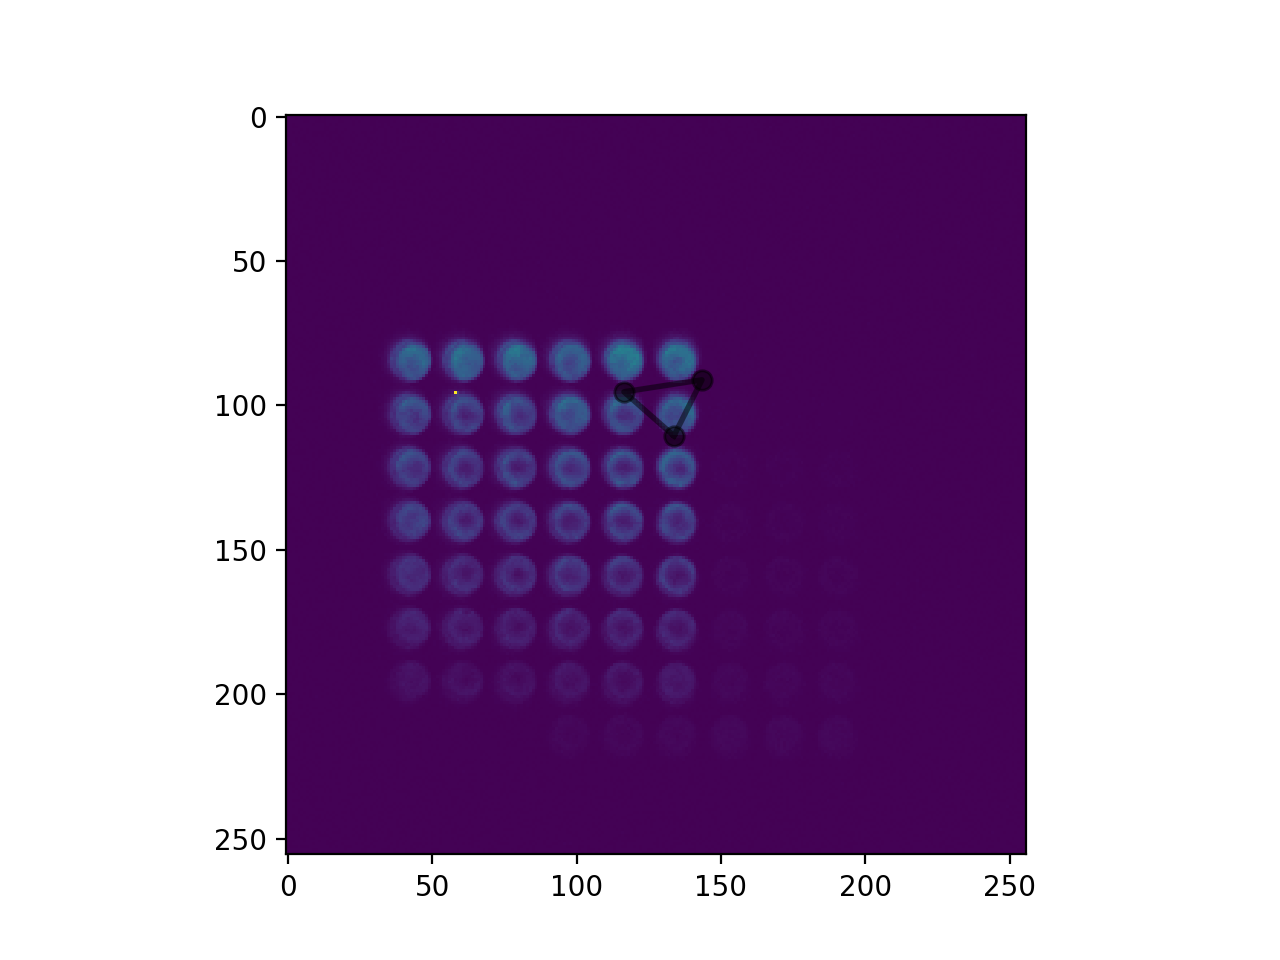

In [23]:
vertsl = []
def onselect(verts):
    print(verts)
    vertsl.append(verts)

fig, ax = plt.subplots()
plt.imshow(plt.imread('5386_4Br.TIF'))
poly = PolygonSelector(ax, onselect)
plt.show()

In [25]:
print(vertsl)

[[(38.83116883116881, 82.8398268398268), (38.83116883116881, 102.92640692640688), (56.83982683982683, 114.70129870129867), (82.46753246753246, 88.38095238095235)], [(38.83116883116881, 82.8398268398268), (38.83116883116881, 102.92640692640688), (56.83982683982683, 114.70129870129867), (82.46753246753246, 88.38095238095235)], [(38.83116883116881, 82.8398268398268), (38.83116883116881, 102.92640692640688), (56.83982683982683, 114.70129870129867), (82.46753246753246, 88.38095238095235)], [(38.83116883116881, 82.8398268398268), (38.83116883116881, 102.92640692640688), (56.83982683982683, 114.70129870129867), (82.46753246753246, 88.38095238095235)], [(69.99999999999997, 141.02164502164499), (88.7012987012987, 150.025974025974), (97.012987012987, 135.48051948051943), (74.84848484848484, 124.39826839826836)], [(133.7229437229437, 110.5454545454545), (143.41991341991343, 91.1515151515151), (116.4069264069264, 95.30735930735926)]]


Try to turn this into a class.

In [40]:
import numpy as np

from matplotlib.widgets import PolygonSelector
from matplotlib.path import Path

class ROI_Selector:
    def __init__(self, img):
        self.img = img
        self.path = None
        self.selector = None
        
    def _onselect(self, verts):
        self.path = Path(verts)
        
    def select(self):
        _, ax = plt.subplots()
        plt.imshow(self.img)
        self.selector = PolygonSelector(ax, self._onselect)

img = plt.imread('5386_4Br.TIF')

In [41]:
test = ROI_Selector(img)

<IPython.core.display.Javascript object>


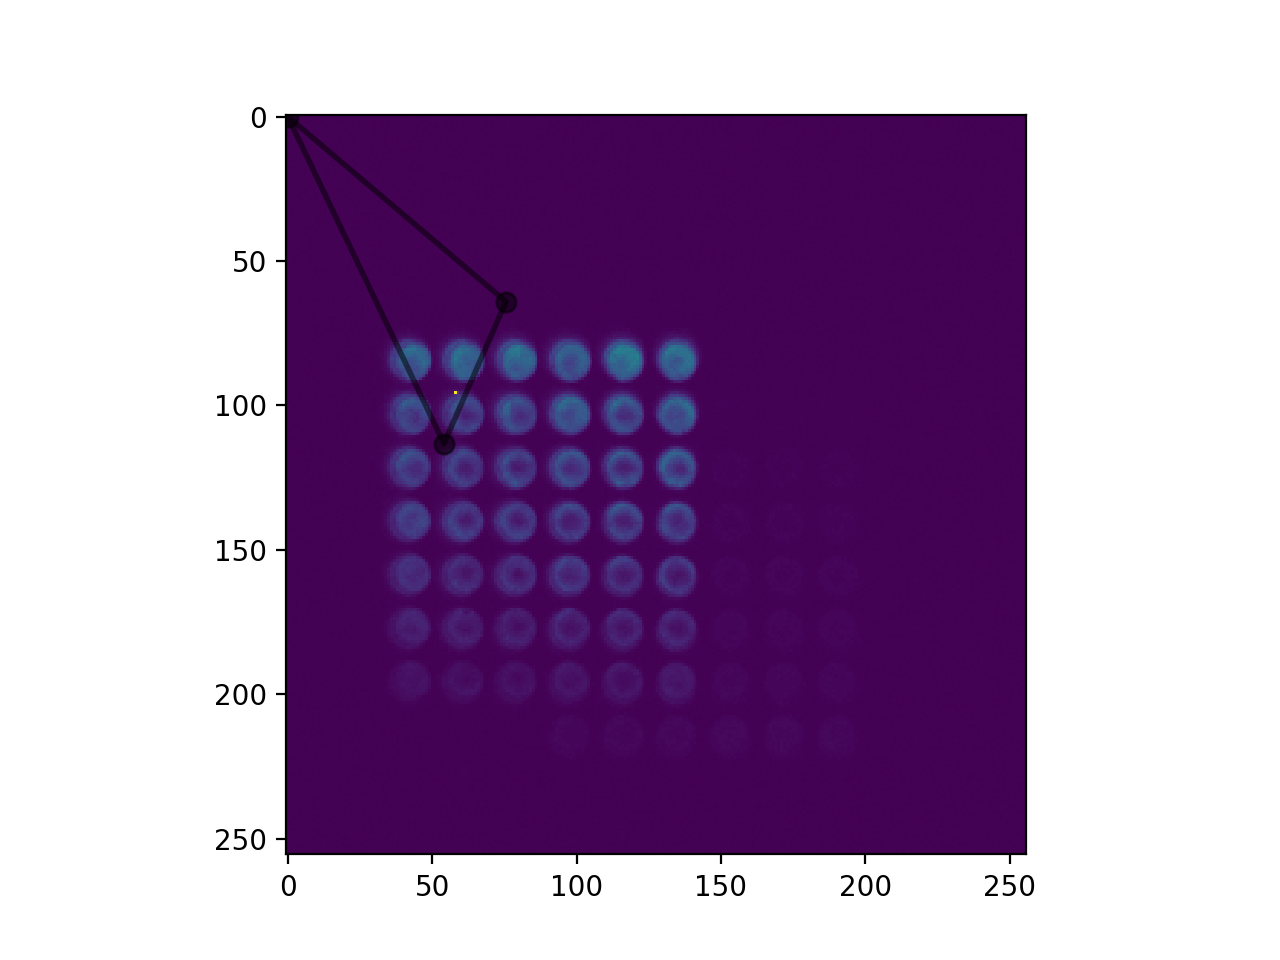

In [42]:
test.select()

In [43]:
print(test.path)

Path(array([[  0.        ,   0.        ],
       [ 54.06926407, 113.22943723],
       [ 75.54112554,  64.05194805]]), None)


In [50]:
np.nonzero(test.path.contains_points(list(zip(range(256),range(256)))))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72]),)

In [52]:
inds = list(zip(range(256),range(256)))
nz = np.nonzero(test.path.contains_points(inds))[0]

In [57]:
nz

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72])

In [58]:
inds

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 36),
 (37, 37),
 (38, 38),
 (39, 39),
 (40, 40),
 (41, 41),
 (42, 42),
 (43, 43),
 (44, 44),
 (45, 45),
 (46, 46),
 (47, 47),
 (48, 48),
 (49, 49),
 (50, 50),
 (51, 51),
 (52, 52),
 (53, 53),
 (54, 54),
 (55, 55),
 (56, 56),
 (57, 57),
 (58, 58),
 (59, 59),
 (60, 60),
 (61, 61),
 (62, 62),
 (63, 63),
 (64, 64),
 (65, 65),
 (66, 66),
 (67, 67),
 (68, 68),
 (69, 69),
 (70, 70),
 (71, 71),
 (72, 72),
 (73, 73),
 (74, 74),
 (75, 75),
 (76, 76),
 (77, 77),
 (78, 78),
 (79, 79),
 (80, 80),
 (81, 81),
 (82, 82),
 (83, 83),
 (84, 84),
 (85, 85),
 (86, 86),
 (87, 87),
 (88, 88),
 (89, 89),
 (90, 90),
 (91, 91),
 (92, 92